<a href="https://colab.research.google.com/github/EdgarGM20/ML-NLP/blob/main/S3P1_proyecto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Proyecto 1 - Predicción de precios de vehículos usados

En este proyecto podrán poner en práctica sus conocimientos sobre modelos predictivos basados en árboles y ensambles, y sobre la disponibilización de modelos. Para su desasrrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 1: Predicción de precios de vehículos usados".

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 4. Sin embargo, es importante que avancen en la semana 3 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 4, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/t/4bd64c1deb3c4ffb8ca7ff93c1f1497d).

## Datos para la predicción de precios de vehículos usados

En este proyecto se usará el conjunto de datos de Car Listings de Kaggle, donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como: año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

## Ejemplo predicción conjunto de test para envío a Kaggle

En esta sección encontrarán el formato en el que deben guardar los resultados de la predicción para que puedan subirlos a la competencia en Kaggle.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Importación librerías
import pandas as pd
import numpy as np

In [4]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')
dataTesting = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTest_carListings.zip', index_col=0)

In [5]:
# Visualización datos de entrenamiento
dataTraining.head()

,Price,Year,Mileage,State,Make,Model
0,34995,2017,9913,FL,Jeep,Wrangler
1,37895,2015,20578,OH,Chevrolet,Tahoe4WD
2,18430,2012,83716,TX,BMW,X5AWD
3,24681,2014,28729,OH,Cadillac,SRXLuxury
4,26998,2013,64032,CO,Jeep,Wrangler


In [6]:
# Visualización datos de test
dataTesting.head()

,Year,Mileage,State,Make,Model
ID,,,,,
0,2014,31909,MD,Nissan,MuranoAWD
1,2017,5362,FL,Jeep,Wrangler
2,2014,50300,OH,Ford,FlexLimited
3,2004,132160,WA,BMW,5
4,2015,25226,MA,Jeep,Grand


In [7]:
# info
dataTraining.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    400000 non-null  int64 
 1   Year     400000 non-null  int64 
 2   Mileage  400000 non-null  int64 
 3   State    400000 non-null  object
 4   Make     400000 non-null  object
 5   Model    400000 non-null  object
dtypes: int64(3), object(3)
memory usage: 18.3+ MB


In [8]:
#check for dublicated rows
print("Numbers of duplicated rows :",dataTraining.duplicated().sum())

Numbers of duplicated rows : 169


In [9]:
#dropping the duplicated rows 
dataTraining = dataTraining.drop_duplicates(keep="first")
print("After removing,now number of duplicated rows are:", dataTraining.duplicated().sum())

After removing,now number of duplicated rows are: 0


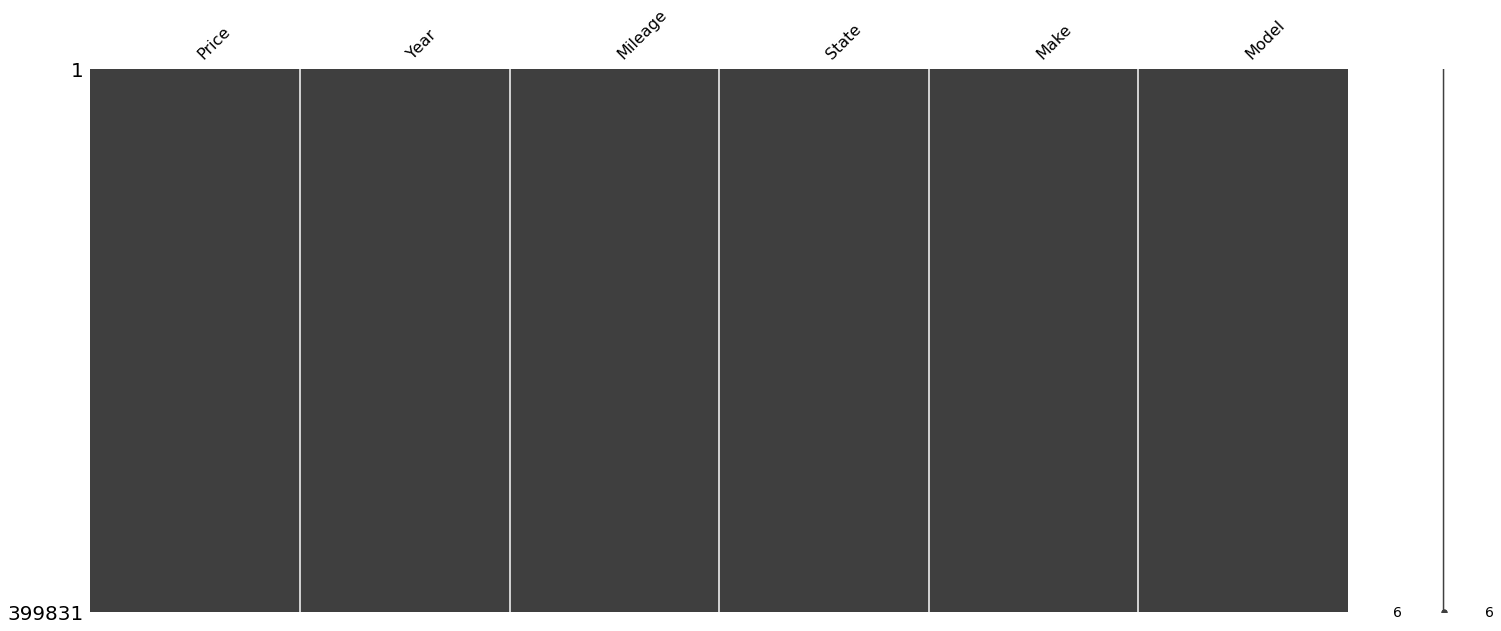

In [10]:
# Check any null values
import missingno
missingno.matrix(dataTraining)

In [11]:
t0 = pd.pivot_table(dataTraining, values='Price', index='Year', aggfunc={'Price':len}, fill_value=0).sort_values(by='Price', ascending=False)
np.round((t0/t0.sum())*100,1).head(15).T

Year,2015,2014,2016,2017,2013,2012,2011,2010,2008,2007,2009,2006,2005,2004,2003
Price,17.9,17.1,14.0,11.2,8.1,7.7,6.0,4.2,3.4,2.8,2.7,1.8,1.2,0.9,0.5


In [12]:
t1 = pd.pivot_table(dataTraining, values='Price', index='State', aggfunc={'Price':len}, fill_value=0).sort_values(by='Price', ascending=False)
t1_ = np.round((t1/t1.sum())*100,1).head(15).T
print("Pesos: \n", t1_)
print("\nSuma pesos: ", np.sum(t1_,1))

Pesos: 
 State    TX   CA   FL   GA   NC   IL   VA   PA   NY   NJ   OH   WA   CO   AZ  \
Price  11.5  9.1  8.4  4.5  4.5  4.2  4.0  3.3  3.1  3.0  2.8  2.7  2.7  2.7   

State   TN  
Price  2.3  

Suma pesos:  Price    68.8
dtype: float64


In [13]:
t2 = pd.pivot_table(dataTraining, values='Price', index='Make', aggfunc={'Price':len}, fill_value=0).sort_values(by='Price', ascending=False)
t2_ = np.round((t2/t2.sum())*100,1).head(15).T
print("Pesos: \n", t2_)
print("\nSuma pesos: ", np.sum(t2_,1))

Pesos: 
 Make   Ford  Chevrolet  Toyota  Honda  Jeep  GMC  Kia  Dodge  Hyundai  Lexus  \
Price  15.7       14.6    11.5    8.3   6.1  5.2  4.1    4.0      3.8    3.4   

Make   BMW  Volkswagen  Nissan  Chrysler  Mercedes-Benz  
Price  3.1         2.8     2.6       2.3            1.9  

Suma pesos:  Price    89.4
dtype: float64


In [14]:
t3 = pd.pivot_table(dataTraining, values='Price', index='Model', aggfunc={'Price':len}, fill_value=0).sort_values(by='Price', ascending=False)
t3_ = np.round((t3/t3.sum())*100,1).head(15).T
print("Pesos: \n", t3_)
print("\nSuma pesos: ", np.sum(t3_,1))

Pesos: 
 Model  Silverado  Grand  Sierra  Accord  F-1504WD  Wrangler  Civic    3  \
Price        4.5    3.1     2.1     1.8       1.7       1.5    1.4  1.4   

Model  Jetta  FusionSE  Santa  EquinoxFWD  CamrySE  Super  CorollaLE  
Price    1.3       1.2    1.2         1.2      1.0    1.0        0.9  

Suma pesos:  Price    25.3
dtype: float64


In [15]:
print('Make', np.size(pd.unique(dataTraining['Make'])))
print('State', np.size(pd.unique(dataTraining['State'])))
print('Year', np.size(pd.unique(dataTraining['Year'])))
print('Model', np.size(pd.unique(dataTraining['Model'])))

Make 38
State 51
Year 22
Model 525


In [16]:
# Preprocesamiento de datos opción 1

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

data = dataTraining.copy()
data['State'] = LabelEncoder().fit_transform(data['State'])
data['Model'] = LabelEncoder().fit_transform(data['Model'])
data['Make'] = LabelEncoder().fit_transform(data['Make'])
#data = data.drop(['State', 'Model', 'Make'], axis=1) # mse=8967.03046802371
#data = data.drop(['State', 'Model'], axis=1) # mse=7708.829971325379
data = data.drop(['State'], axis=1) # mse=5879.905043917509
#data = data.drop(['Model'], axis=1) # mse=7699.480418043603
#data = data.drop(['Make'], axis=1) # mse=6324.633354525394
#data = data.drop(['State', 'Make'], axis=1) # mse=6244.755213698949
#data = data.drop(['Model', 'Make'], axis=1) # mse=8901.556756613661
#data = data.drop([], axis=1) # mse=5909.963023939867
#data.head()

# Separación de variables predictoras (X) y variable de interés (y)
y = data['Price']
X = data.drop(['Price'], axis=1)

# Separación de datos en set de entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#X_train

# Importación y definición de modelo XGBRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

clf_XG_1 = XGBRegressor()

# Entrenamiento (fit) y desempeño del modelo XGBRegressor
clf_XG_1.fit(X_train, y_train)
y_pred_XG_1 = clf_XG_1.predict(X_test)

mse_XG_1 = mean_squared_error(y_pred_XG_1, y_test.values, squared=False)
print('El mean_squared_error en la muestra de test es:')
print(mse_XG_1)


# Impresión de resultados de desemepeño del modelo
feature_cols_name = X_test.columns
pd.DataFrame({'feature':feature_cols_name, 'importance':clf_XG_1.feature_importances_}).sort_values('importance')

# Predicción del conjunto de test
Dataset = dataTesting.copy()
Dataset['State'] = LabelEncoder().fit_transform(Dataset['State'])
Dataset['Make'] = LabelEncoder().fit_transform(Dataset['Make'])
Dataset['Model'] = LabelEncoder().fit_transform(Dataset['Model'])

Dataset = Dataset.drop(['State'], axis=1) # mse=5879.905043917509
prediccion = clf_XG_1.predict(Dataset)

y_pred = pd.DataFrame(prediccion, index=Dataset.index, columns=['Price'])


[00:55:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
El mean_squared_error en la muestra de test es:
5879.905043917509


In [31]:
# Preprocesamiento de datos opción 2

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

data = dataTraining.copy()
data['State'] = LabelEncoder().fit_transform(data['State'])
data['Model'] = LabelEncoder().fit_transform(data['Model'])
data['Make'] = LabelEncoder().fit_transform(data['Make'])
#data = data.drop(['State', 'Model', 'Make'], axis=1) # mse=8967.03046802371
#data = data.drop(['State', 'Model'], axis=1) # mse=7708.829971325379
data = data.drop(['State'], axis=1) # mse=5879.905043917509
#data = data.drop(['Model'], axis=1) # mse=7699.480418043603
#data = data.drop(['Make'], axis=1) # mse=6324.633354525394
#data = data.drop(['State', 'Make'], axis=1) # mse=6244.755213698949
#data = data.drop(['Model', 'Make'], axis=1) # mse=8901.556756613661
#data = data.drop([], axis=1) # mse=5909.963023939867
#data.head()

# Separación de variables predictoras (X) y variable de interés (y)
y = data['Price']
X = data.drop(['Price'], axis=1)

scaler = StandardScaler()
scaler.fit(X)
Xn = scaler.transform(X)


# Separación de datos en set de entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size=0.33, random_state=42)
#X_train

# Importación y definición de modelo XGBRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

clf_XG_2 = XGBRegressor()

# Entrenamiento (fit) y desempeño del modelo XGBRegressor
clf_XG_2.fit(X_train, y_train)
y_pred_XG_2 = clf_XG_2.predict(X_test)

mse_XG_2 = mean_squared_error(y_pred_XG_2, y_test.values, squared=False)
print('El mean_squared_error en la muestra de test es:')
print(mse_XG_2)


# Impresión de resultados de desemepeño del modelo
feature_cols_name = X.columns
pd.DataFrame({'feature':feature_cols_name, 'importance':clf_XG_2.feature_importances_}).sort_values('importance')

# Predicción del conjunto de test
Dataset = dataTesting.copy()
Dataset['State'] = LabelEncoder().fit_transform(Dataset['State'])
Dataset['Make'] = LabelEncoder().fit_transform(Dataset['Make'])
Dataset['Model'] = LabelEncoder().fit_transform(Dataset['Model'])

Dataset = Dataset.drop(['State'], axis=1) # mse=5879.905043917509
scaler1 = StandardScaler()
scaler1.fit(Dataset)
Datasetn = scaler1.transform(Dataset)

prediccion = clf_XG_2.predict(Datasetn)

y_pred = pd.DataFrame(prediccion, index=Dataset.index, columns=['Price'])


[01:28:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
El mean_squared_error en la muestra de test es:
5879.905043917509


In [28]:
prediccion

array([22583.508, 35716.77 , 17865.855, ..., 22361.938, 23044.225,
       20383.592], dtype=float32)

In [18]:
# Guardar predicciones en formato exigido en la competencia de kaggle
y_pred.to_csv('/content/drive/MyDrive/Data/test_submission.csv', index_label='ID')
#y_pred.to_csv('test_submission.csv', index_label='ID')
y_pred.head()

,Price
ID,
0,22583.507812
1,35716.769531
2,17865.855469
3,8955.688477
4,24263.414062


In [ ]:
"""
# Preprocesamiento de datos

data = dataTraining.copy()
data = data.join(pd.get_dummies(data['Model'], prefix='Mo'))
data = data.join(pd.get_dummies(data['Make'], prefix='Ma'))
data = data.join(pd.get_dummies(data['State'], prefix='St'))

data = data.drop(['Model', 'Make', 'State'], axis=1)
#data = data.loc[data['Model'].str.contains('Camry')].drop(['Make', 'State'], axis=1)
#data = data.join(pd.get_dummies(data['Model'], prefix='M'))
#data['HighPrice'] = (data['Price'] > data['Price'].mean()).astype(int)
#data = data.drop(['Model', 'Price'], axis=1)

# Visualización dataset
data.head()

"""


In [ ]:
"""
# Separación de variables predictoras (X) y variable de interés (y)
y = data['Price']
X = data.drop(['Price'], axis=1)
"""

In [ ]:
"""
# Separación de datos en set de entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#X_train
"""

In [ ]:
"""
# Importación y definición de modelo XGBRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

clf_XG = XGBRegressor()

# Entrenamiento (fit) y desempeño del modelo XGBRegressor
clf_XG.fit(X_train, y_train)
y_pred_XG_ = clf_XG.predict(X_test)

mse_XG = mean_squared_error(y_pred_XG_, y_test.values, squared=False)
print('El mean_squared_error en la muestra de test es:')
print(mse_XG)


# Impresión de resultados de desemepeño del modelo
feature_cols_name = X_test.columns
"""

In [ ]:
"""
#Random Forest
from sklearn.ensemble import RandomForestRegressor

# Definición de modelo Random Forest para un problema de regresión
clf_RF = RandomForestRegressor(random_state=1, n_jobs=-1)
clf_RF.fit(X_train, y_train)

y_pred_RF_ = clf_RF.predict(X_test)

mse_RF = mean_squared_error(y_pred_RF_, y_test.values, squared=False)
print('El mean_squared_error en la muestra de test es:')
print(mse_RF)
"""

In [ ]:
"""
# Predicción del conjunto de test - acá se genera un número aleatorio como ejemplo
np.random.seed(42)
y_pred = pd.DataFrame(np.random.rand(dataTesting.shape[0]) * 75000 + 5000, index=dataTesting.index, columns=['Price'])
"""

In [ ]:
"""
# Guardar predicciones en formato exigido en la competencia de kaggle
y_pred.to_csv('test_submission.csv', index_label='ID')
y_pred.head()
"""